# Stock Market Prediction

In [75]:
import pandas as pd
#from pandas import NaT
import numpy as np

import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [76]:
df = pd.read_csv("./zomato.csv")

In [77]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [78]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,631.000000,631.000000,631.000000,631.000000,631.000000,6.310000e+02
mean,90.011252,91.835737,87.868304,89.707686,89.707686,6.731737e+07
std,32.757639,33.319545,31.900849,32.621900,32.621900,7.461030e+07
min,40.849998,44.400002,40.599998,41.650002,41.650002,0.000000e+00
25%,62.549999,63.450001,61.125000,62.074998,62.074998,2.800788e+07
50%,80.000000,81.000000,78.099998,79.699997,79.699997,4.759710e+07
75%,124.474998,126.750000,121.525002,124.599998,124.599998,7.525439e+07
max,161.149994,169.000000,154.250000,160.300003,160.300003,6.948953e+08


In [79]:
import skimpy as sk

In [80]:
#pip install skimpy

In [81]:
sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 631    │ │ float64     │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA  ┃ NA % ┃ mean     ┃ sd       ┃ p0 ┃ p25      ┃ p50      ┃ p75      ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Open         │   0 │    0 │       90 │       33 │ 41 │       63 │       80 │      120 │       160 │ ▆▇▃▂▆▂ │  │
│ │ High         │   0 │    0 │       92 │       33 │ 44 │       63 │       81 │      130 │       170 │ ▇▆▃▂▆▁ │  │
│ │ Low          │   0 │    0 │       88 │       32 │ 41 │       61 │       78 │      120 │       150 │ ▆▇▃▂▅▃ │  │
│ │ Close        │   0 │    0 │       90 │       33 │ 42 │       62 │       80 │      120 │       160 │ ▆▇▃▂▆▂ │  │
│ │ Adj Close    │   0 │    0 │       90 │       33 │ 42 │       62 │       80 │      120 │       160 │ ▆▇▃▂▆▂ │  │
│ │ Volume       │   0 │    0 │ 67000000 │ 75000000 │  0 │ 28000000 │ 48000000 │ 75000000 │ 690000000 │   ▇▁   │  │
│ └──────────────┴─────┴──────┴──────────┴──────────┴────┴──────────┴──────────┴──────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Date                      │       0 │          0 │                            1 │                      631 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [82]:
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
def convert_dates(x):
    date = datetime.datetime.strptime(x, "%Y-%m-%d")
    return [date.year, date.month, date.day, date.isoweekday()]

In [83]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089
...,...,...,...,...,...,...,...
626,2024-02-01,141.000000,143.500000,138.550003,140.550003,140.550003,70252449
627,2024-02-02,141.800003,145.000000,141.449997,143.800003,143.800003,78666454
628,2024-02-05,145.000000,145.399994,138.250000,140.250000,140.250000,54189688
629,2024-02-06,140.399994,141.800003,138.050003,139.949997,139.949997,46782951


In [84]:
df["Year"] = df["Date"].apply(lambda x: convert_dates(x)[0])
df["Month"] = df["Date"].apply(lambda x: months[convert_dates(x)[1]-1])
df["Day"] = df["Date"].apply(lambda x: convert_dates(x)[2])
df["Weekday"] = df["Date"].apply(lambda x: days[convert_dates(x)[3]-1])

In [85]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Weekday
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290,2021,July,23,Friday
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854,2021,July,26,Monday
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900,2021,July,27,Tuesday
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731,2021,July,28,Wednesday
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089,2021,July,29,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
626,2024-02-01,141.000000,143.500000,138.550003,140.550003,140.550003,70252449,2024,February,1,Thursday
627,2024-02-02,141.800003,145.000000,141.449997,143.800003,143.800003,78666454,2024,February,2,Friday
628,2024-02-05,145.000000,145.399994,138.250000,140.250000,140.250000,54189688,2024,February,5,Monday
629,2024-02-06,140.399994,141.800003,138.050003,139.949997,139.949997,46782951,2024,February,6,Tuesday


In [86]:
df.to_csv('data.csv')

In [87]:
for i in df.columns [1 :7]:
    fig = px.line(df, x="Date", y=i , color= "Year")
    fig.show()

In [88]:
df = df.describe([x*0.1 for x in range (10)])

In [89]:
df1 = df

In [90]:
df1

,Open,High,Low,Close,Adj Close,Volume,Year,Day
count,631.000000,631.000000,631.000000,631.000000,631.000000,6.310000e+02,631.000000,631.000000
mean,90.011252,91.835737,87.868304,89.707686,89.707686,6.731737e+07,2022.297940,15.782884
std,32.757639,33.319545,31.900849,32.621900,32.621900,7.461030e+07,0.804735,8.859687
min,40.849998,44.400002,40.599998,41.650002,41.650002,0.000000e+00,2021.000000,1.000000
0%,40.849998,44.400002,40.599998,41.650002,41.650002,0.000000e+00,2021.000000,1.000000
10%,54.000000,55.150002,53.000000,53.950001,53.950001,1.393415e+07,2021.000000,4.000000
20%,59.200001,60.799999,57.900002,59.200001,59.200001,2.326409e+07,2022.000000,7.000000
30%,63.849998,64.900002,62.450001,63.500000,63.500000,3.260675e+07,2022.000000,10.000000
40%,68.400002,70.000000,66.500000,68.699997,68.699997,3.997921e+07,2022.000000,13.000000
50%,80.000000,81.000000,78.099998,79.699997,79.699997,4.759710e+07,2022.000000,16.000000


<Axes: xlabel='Open'>

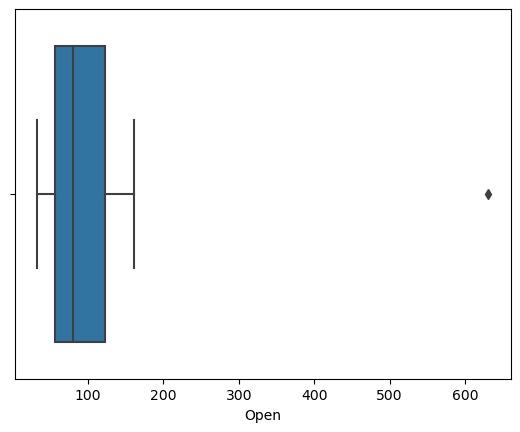

In [91]:
import seaborn as sns
sns.boxplot(x=df1['Open'])

<Axes: xlabel='Close'>

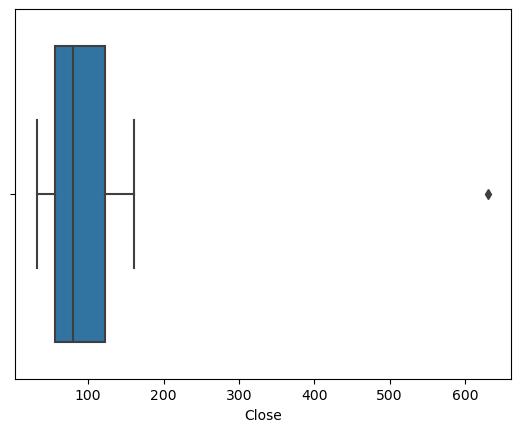

In [92]:
sns.boxplot(x=df1['Close'])

<Axes: xlabel='High'>

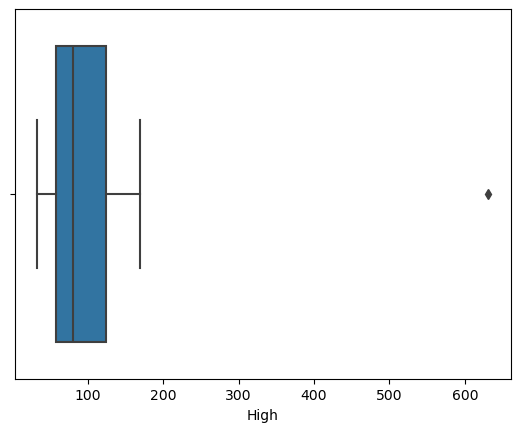

In [93]:
sns.boxplot(x=df1['High'])

<Axes: xlabel='Low'>

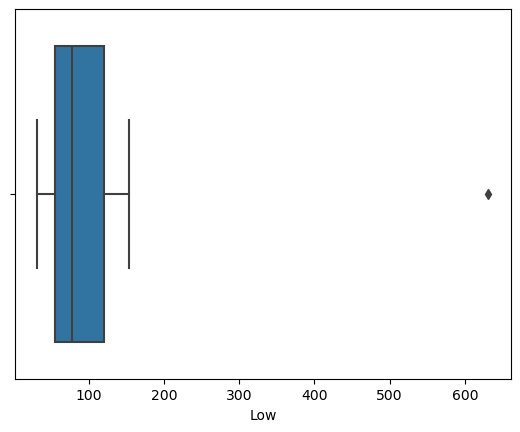

In [94]:
sns.boxplot(x = df1['Low'])

<Axes: xlabel='Adj Close'>

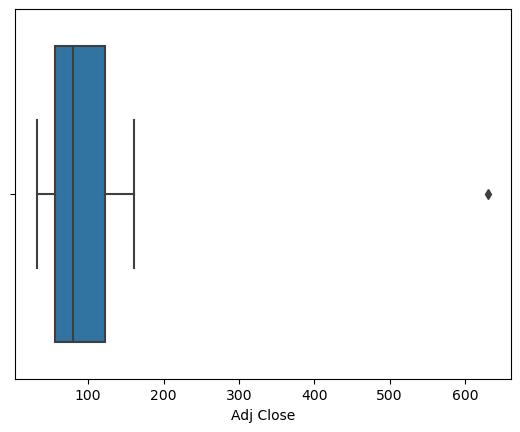

In [95]:
sns.boxplot(x= df['Adj Close'])

In [96]:
#df1 = df[df['Open']<df['Open'].quantile(0.9)]

<Axes: xlabel='Open'>

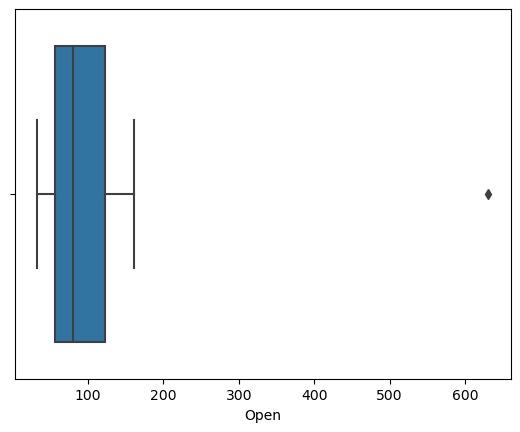

In [97]:
sns.boxplot(x=df1['Open'])

<Axes: xlabel='Open'>

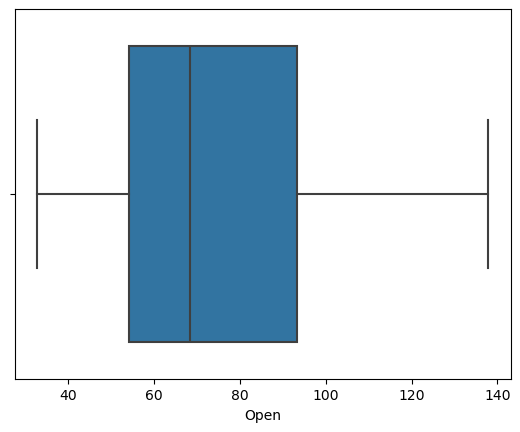

In [98]:
df= df[df['Open']<df['Open'].quantile(0.9)]

sns.boxplot(x= df['Open'])

In [99]:
df1

,Open,High,Low,Close,Adj Close,Volume,Year,Day
count,631.000000,631.000000,631.000000,631.000000,631.000000,6.310000e+02,631.000000,631.000000
mean,90.011252,91.835737,87.868304,89.707686,89.707686,6.731737e+07,2022.297940,15.782884
std,32.757639,33.319545,31.900849,32.621900,32.621900,7.461030e+07,0.804735,8.859687
min,40.849998,44.400002,40.599998,41.650002,41.650002,0.000000e+00,2021.000000,1.000000
0%,40.849998,44.400002,40.599998,41.650002,41.650002,0.000000e+00,2021.000000,1.000000
10%,54.000000,55.150002,53.000000,53.950001,53.950001,1.393415e+07,2021.000000,4.000000
20%,59.200001,60.799999,57.900002,59.200001,59.200001,2.326409e+07,2022.000000,7.000000
30%,63.849998,64.900002,62.450001,63.500000,63.500000,3.260675e+07,2022.000000,10.000000
40%,68.400002,70.000000,66.500000,68.699997,68.699997,3.997921e+07,2022.000000,13.000000
50%,80.000000,81.000000,78.099998,79.699997,79.699997,4.759710e+07,2022.000000,16.000000
